# Import necessary lIbraries

In [1]:
#Here we import the all libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load the data

In [2]:
# here import the directory
data_dir = os.listdir('/kaggle/working/')#here the data_dir is varaible for datadirectory

In [3]:
data_dir#here read the Data Dir

['__notebook__.ipynb']

In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')#here data variable load with train data

In [5]:
df.shape

(159256, 24)

# EDA

In [6]:
#head of the data
df.head(5)

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0   55         165          60       81.0             0.5   
1   1   70         165          65       89.0             0.6   
2   2   20         170          75       81.0             0.4   
3   3   35         180          95      105.0             1.5   
4   4   30         165          60       80.5             1.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  LDL  \
0              0.6              1               1       135  ...   40   75   
1              0.7              2               2       146  ...   57  126   
2              0.5              1               1       118  ...   45   93   
3              1.2              1               1       131  ...   38  102   
4              1.0              1               1       121  ...   44   93   

   hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
0        16.5              1               1.0   22   25   27              0   
1        16.2              1               1.1   27   23   37              1   
2        17.4              1               0.8   27   31   53              0   
3        15.9              1               1.0   20   27   30              1   
4        15.4              1               0.8   19   13   17              0   

   smoking  
0        1  
1        0  
2        1  
3        0  
4        1  

[5 rows x 24 columns]

In [7]:
#now see the tail of the data
df.tail(5)

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
159251  159251   40         155          45       69.0             1.5   
159252  159252   50         155          75       82.0             1.0   
159253  159253   40         160          50       66.0             1.5   
159254  159254   50         165          75       92.0             1.2   
159255  159255   40         145          45       76.4             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  \
159251              2.0              1               1       127  ...   72   
159252              1.0              1               1       120  ...   64   
159253              1.0              1               1       114  ...   87   
159254              1.0              1               1       121  ...   55   
159255              1.2              1               1       125  ...   87   

        LDL  hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  \
159251  159        14.5              1               0.8   25   26   13   
159252  108        14.5              1               0.6   21   20   18   
159253   93        10.9              1               0.6   15    9   12   
159254   80        14.4              1               1.1   22   17   37   
159255   81        14.0              1               0.8   21   16   17   

        dental caries  smoking  
159251              0        0  
159252              0        0  
159253              0        0  
159254              0        1  
159255              0        0  

[5 rows x 24 columns]

In [8]:
#shape of the data 
df.shape

(159256, 24)

In [9]:
#check the null vlaues 
df.isnull().sum()#there is no null values 

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [10]:
#check for duplicated values 
df.duplicated().sum()#here there is no duplicated Values

0

In [11]:
#first moment
df.describe()

id            age     height(cm)     weight(kg)  \
count  159256.000000  159256.000000  159256.000000  159256.000000   
mean    79627.500000      44.306626     165.266929      67.143662   
std     45973.391572      11.842286       8.818970      12.586198   
min         0.000000      20.000000     135.000000      30.000000   
25%     39813.750000      40.000000     160.000000      60.000000   
50%     79627.500000      40.000000     165.000000      65.000000   
75%    119441.250000      55.000000     170.000000      75.000000   
max    159255.000000      85.000000     190.000000     130.000000   

           waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  \
count  159256.000000   159256.000000    159256.000000  159256.000000   
mean       83.001990        1.005798         1.000989       1.023974   
std         8.957937        0.402113         0.392299       0.152969   
min        51.000000        0.100000         0.100000       1.000000   
25%        77.000000        0.800000         0.800000       1.000000   
50%        83.000000        1.000000         1.000000       1.000000   
75%        89.000000        1.200000         1.200000       1.000000   
max       127.000000        9.900000         9.900000       2.000000   

       hearing(right)       systolic  ...            HDL            LDL  \
count   159256.000000  159256.000000  ...  159256.000000  159256.000000   
mean         1.023421     122.503648  ...      55.852684     114.607682   
std          0.151238      12.729315  ...      13.964141      28.158931   
min          1.000000      77.000000  ...       9.000000       1.000000   
25%          1.000000     114.000000  ...      45.000000      95.000000   
50%          1.000000     121.000000  ...      54.000000     114.000000   
75%          1.000000     130.000000  ...      64.000000     133.000000   
max          2.000000     213.000000  ...     136.000000    1860.000000   

          hemoglobin  Urine protein  serum creatinine            AST  \
count  159256.000000  159256.000000     159256.000000  159256.000000   
mean       14.796965       1.074233          0.892764      25.516853   
std         1.431213       0.347856          0.179346       9.464882   
min         4.900000       1.000000          0.100000       6.000000   
25%        13.800000       1.000000          0.800000      20.000000   
50%        15.000000       1.000000          0.900000      24.000000   
75%        15.800000       1.000000          1.000000      29.000000   
max        21.000000       6.000000          9.900000     778.000000   

                 ALT            Gtp  dental caries        smoking  
count  159256.000000  159256.000000  159256.000000  159256.000000  
mean       26.550296      36.216004       0.197996       0.437365  
std        17.753070      31.204643       0.398490       0.496063  
min         1.000000       2.000000       0.000000       0.000000  
25%        16.000000      18.000000       0.000000       0.000000  
50%        22.000000      27.000000       0.000000       0.000000  
75%        32.000000      44.000000       0.000000       1.000000  
max      2914.000000     999.000000       1.000000       1.000000  

[8 rows x 24 columns]

In [12]:
#second moment
df.describe().T

count          mean           std    min       25%  \
id                   159256.0  79627.500000  45973.391572    0.0  39813.75   
age                  159256.0     44.306626     11.842286   20.0     40.00   
height(cm)           159256.0    165.266929      8.818970  135.0    160.00   
weight(kg)           159256.0     67.143662     12.586198   30.0     60.00   
waist(cm)            159256.0     83.001990      8.957937   51.0     77.00   
eyesight(left)       159256.0      1.005798      0.402113    0.1      0.80   
eyesight(right)      159256.0      1.000989      0.392299    0.1      0.80   
hearing(left)        159256.0      1.023974      0.152969    1.0      1.00   
hearing(right)       159256.0      1.023421      0.151238    1.0      1.00   
systolic             159256.0    122.503648     12.729315   77.0    114.00   
relaxation           159256.0     76.874071      8.994642   44.0     70.00   
fasting blood sugar  159256.0     98.352552     15.329740   46.0     90.00   
Cholesterol          159256.0    195.796165     28.396959   77.0    175.00   
triglyceride         159256.0    127.616046     66.188989    8.0     77.00   
HDL                  159256.0     55.852684     13.964141    9.0     45.00   
LDL                  159256.0    114.607682     28.158931    1.0     95.00   
hemoglobin           159256.0     14.796965      1.431213    4.9     13.80   
Urine protein        159256.0      1.074233      0.347856    1.0      1.00   
serum creatinine     159256.0      0.892764      0.179346    0.1      0.80   
AST                  159256.0     25.516853      9.464882    6.0     20.00   
ALT                  159256.0     26.550296     17.753070    1.0     16.00   
Gtp                  159256.0     36.216004     31.204643    2.0     18.00   
dental caries        159256.0      0.197996      0.398490    0.0      0.00   
smoking              159256.0      0.437365      0.496063    0.0      0.00   

                         50%        75%       max  
id                   79627.5  119441.25  159255.0  
age                     40.0      55.00      85.0  
height(cm)             165.0     170.00     190.0  
weight(kg)              65.0      75.00     130.0  
waist(cm)               83.0      89.00     127.0  
eyesight(left)           1.0       1.20       9.9  
eyesight(right)          1.0       1.20       9.9  
hearing(left)            1.0       1.00       2.0  
hearing(right)           1.0       1.00       2.0  
systolic               121.0     130.00     213.0  
relaxation              78.0      82.00     133.0  
fasting blood sugar     96.0     103.00     375.0  
Cholesterol            196.0     217.00     393.0  
triglyceride           115.0     165.00     766.0  
HDL                     54.0      64.00     136.0  
LDL                    114.0     133.00    1860.0  
hemoglobin              15.0      15.80      21.0  
Urine protein            1.0       1.00       6.0  
serum creatinine         0.9       1.00       9.9  
AST                     24.0      29.00     778.0  
ALT                     22.0      32.00    2914.0  
Gtp                     27.0      44.00     999.0  
dental caries            0.0       0.00       1.0  
smoking                  0.0       1.00       1.0

In [13]:
#third momemt
df.skew()

id                      0.000000
age                     0.291697
height(cm)             -0.269915
weight(kg)              0.378075
waist(cm)               0.072446
eyesight(left)          8.890572
eyesight(right)         8.486849
hearing(left)           6.223920
hearing(right)          6.302437
systolic                0.219925
relaxation              0.176350
fasting blood sugar     3.461099
Cholesterol             0.043488
triglyceride            0.986228
HDL                     0.758884
LDL                     6.874810
hemoglobin             -0.633571
Urine protein           5.585562
serum creatinine        1.511059
AST                    11.592346
ALT                    34.830012
Gtp                     5.414827
dental caries           1.515762
smoking                 0.252532
dtype: float64

In [14]:
#fourth Moment
df.kurt()

id                       -1.200000
age                      -0.158797
height(cm)               -0.530773
weight(kg)               -0.036576
waist(cm)                -0.056411
eyesight(left)          196.465469
eyesight(right)         192.729347
hearing(left)            36.737645
hearing(right)           37.721184
systolic                  0.212052
relaxation                0.142201
fasting blood sugar      27.200004
Cholesterol              -0.206281
triglyceride              0.996108
HDL                       0.303326
LDL                     323.631298
hemoglobin                0.958526
Urine protein            35.953698
serum creatinine         58.931478
AST                     629.519332
ALT                    4870.241909
Gtp                      69.558428
dental caries             0.297538
smoking                  -1.936252
dtype: float64

<Axes: ylabel='count'>

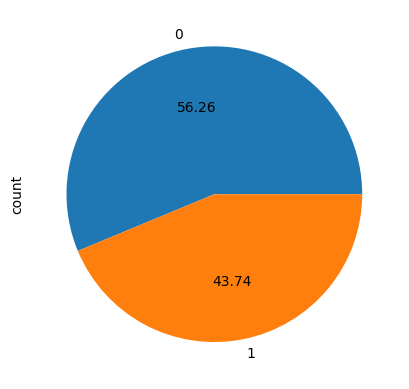

In [15]:
#visualization of data balanced or not
df['smoking'].value_counts().plot.pie(autopct='%.2f')#better the data is balanced

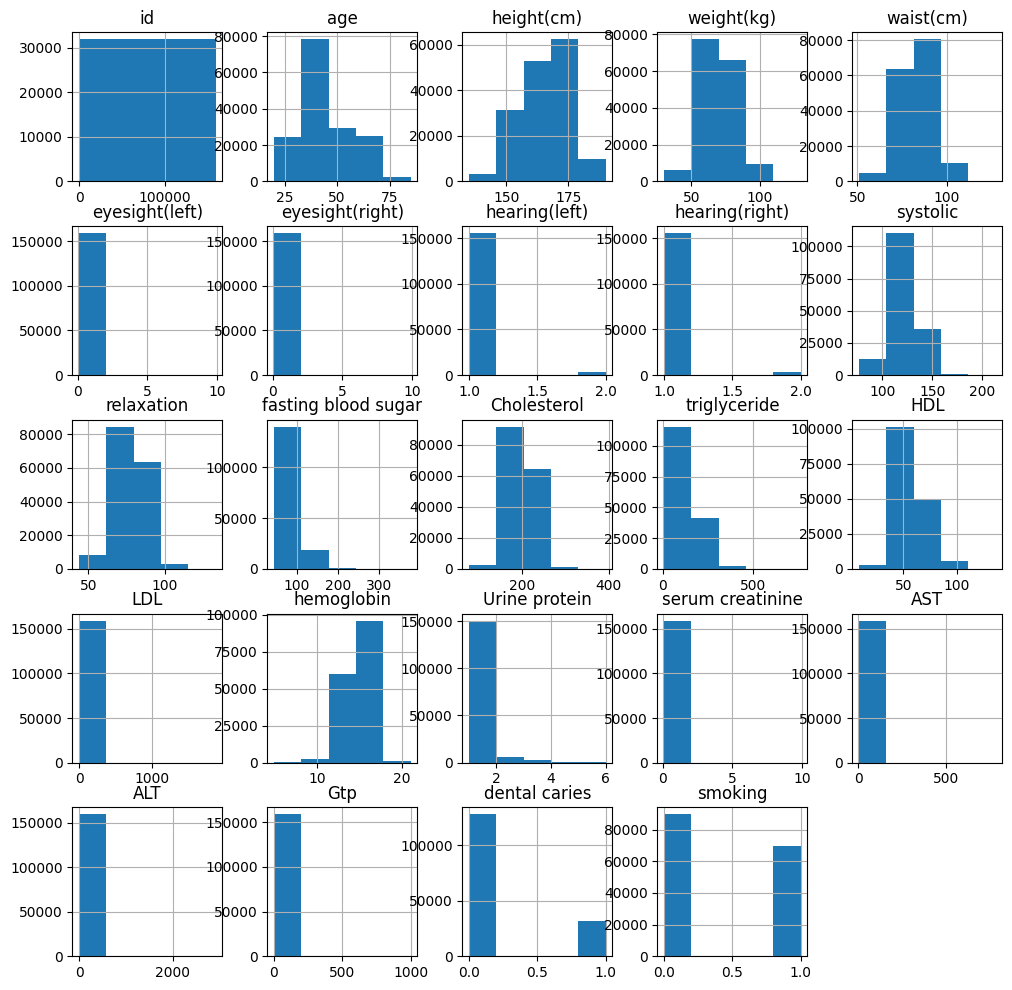

In [16]:
#histogram
df.hist(bins=5,figsize=(12,12))
plt.show()

<Figure size 600x500 with 0 Axes>

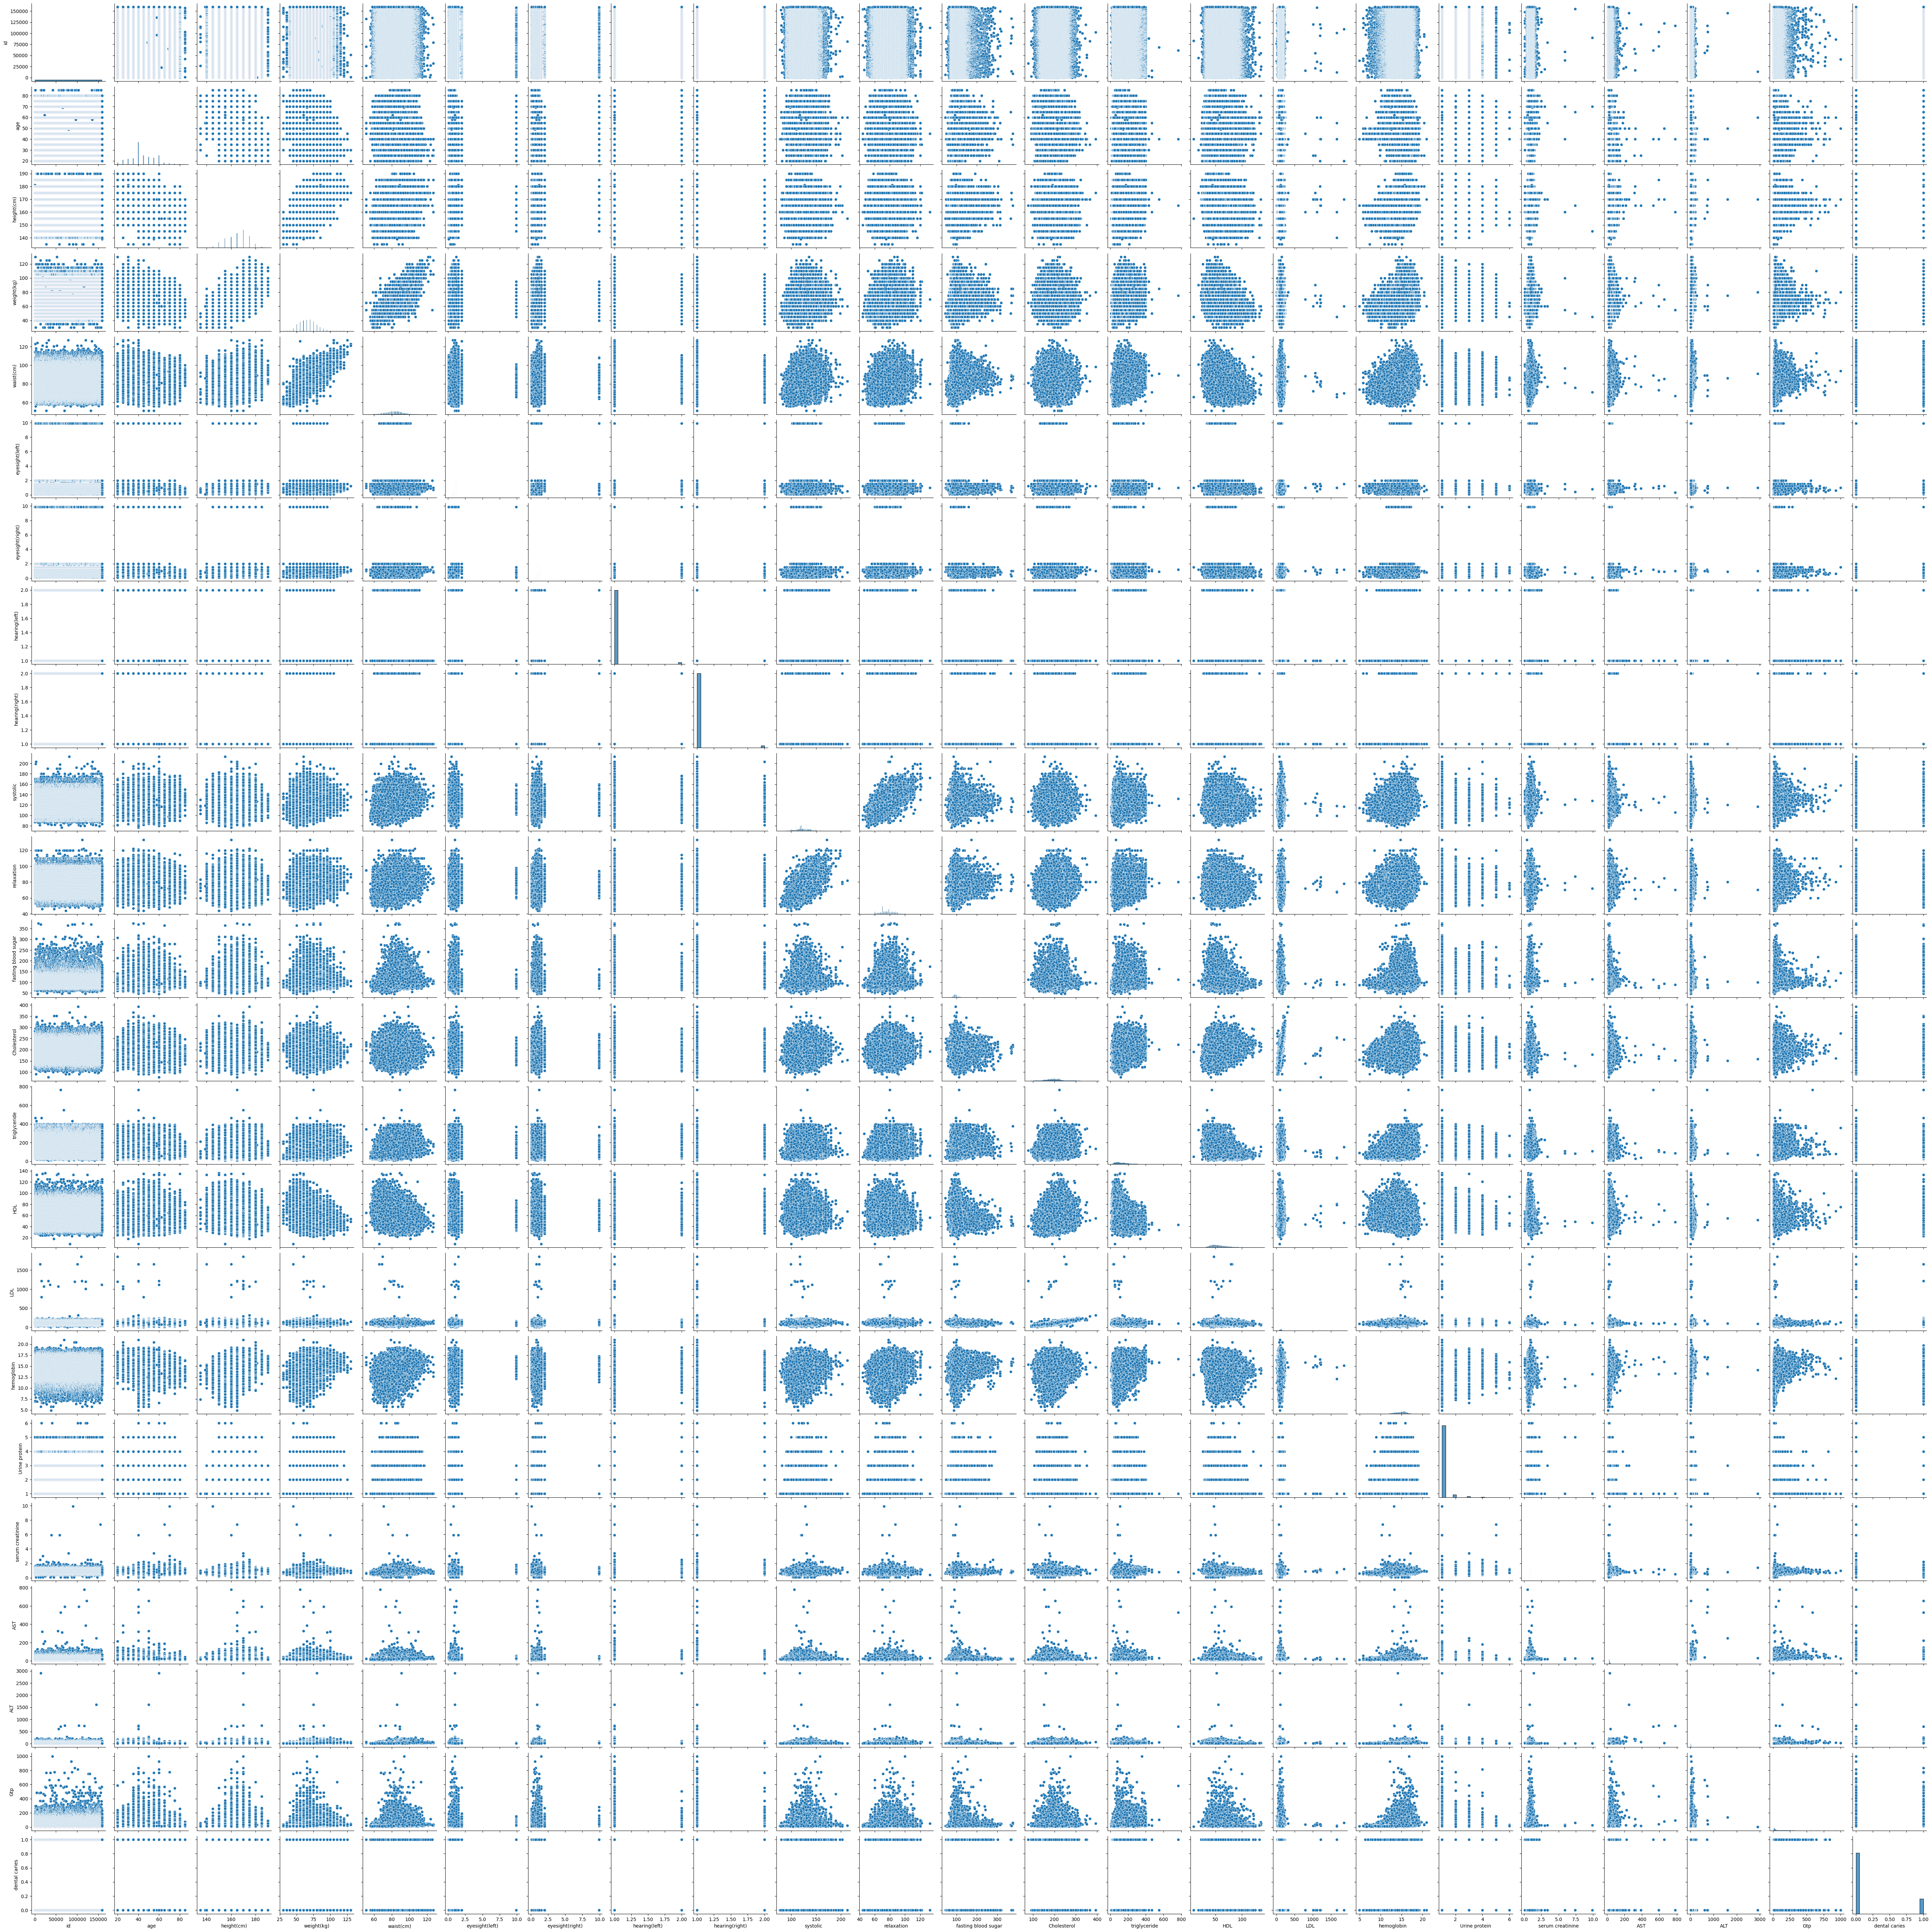

In [17]:
#Bivariate historgram
plt.figure(figsize=(6,5))
sns.pairplot(data=df.drop(['smoking'],axis=1))
plt.show()

<Axes: >

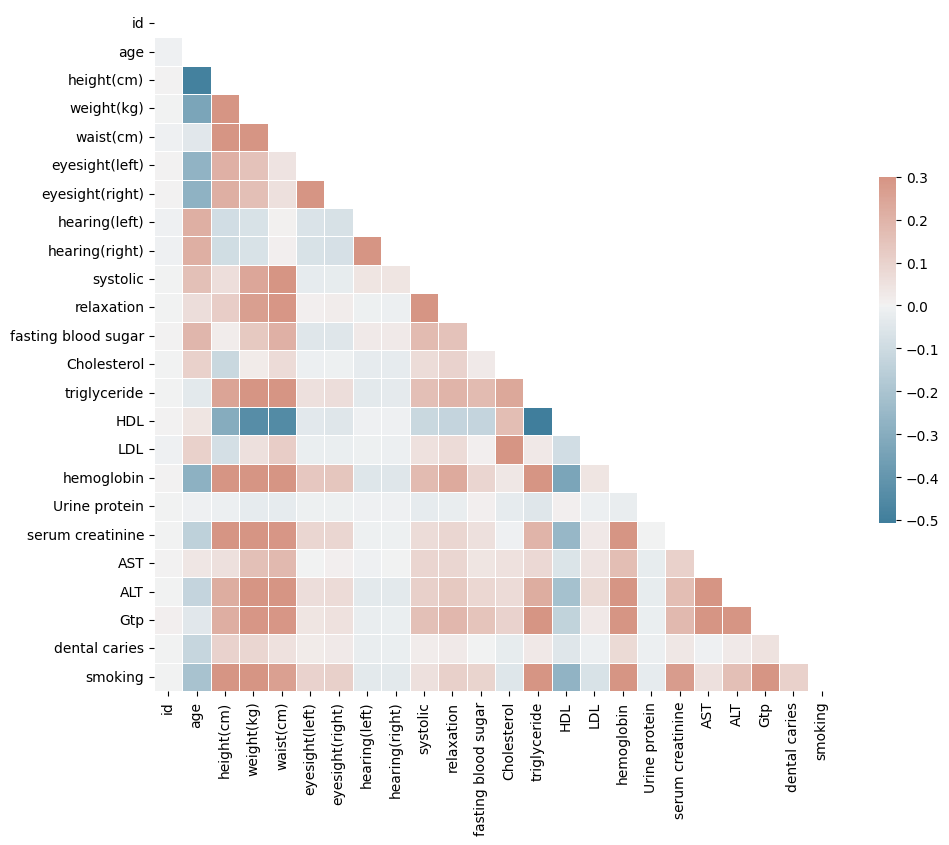

In [18]:
#correlation map
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Training and Testing

In [19]:
# Split the data into features (X) and target (y)
X =df.drop('smoking', axis=1)
y =df['smoking']

In [20]:
column_names = X.columns

# Scaling the data

In [21]:
#Robust scaler 
Robust_scaler= RobustScaler()
scaled_data = Robust_scaler.fit_transform(X)

In [22]:
scaled_df =pd.DataFrame(scaled_data,columns=column_names)

In [23]:
scaled_df

id       age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0      -1.000000  1.000000         0.0   -0.333333  -0.166667           -1.25   
1      -0.999987  2.000000         0.0    0.000000   0.500000           -1.00   
2      -0.999975 -1.333333         0.5    0.666667  -0.166667           -1.50   
3      -0.999962 -0.333333         1.5    2.000000   1.833333            1.25   
4      -0.999950 -0.666667         0.0   -0.333333  -0.208333            1.25   
...          ...       ...         ...         ...        ...             ...   
159251  0.999950  0.000000        -1.0   -1.333333  -1.166667            1.25   
159252  0.999962  0.666667        -1.0    0.666667  -0.083333            0.00   
159253  0.999975  0.000000        -0.5   -1.000000  -1.416667            1.25   
159254  0.999987  0.666667         0.0    0.666667   0.750000            0.50   
159255  1.000000  0.000000        -2.0   -1.333333  -0.550000            0.00   

        eyesight(right)  hearing(left)  hearing(right)  systolic  ...  \
0                 -1.00            0.0             0.0    0.8750  ...   
1                 -0.75            1.0             1.0    1.5625  ...   
2                 -1.25            0.0             0.0   -0.1875  ...   
3                  0.50            0.0             0.0    0.6250  ...   
4                  0.00            0.0             0.0    0.0000  ...   
...                 ...            ...             ...       ...  ...   
159251             2.50            0.0             0.0    0.3750  ...   
159252             0.00            0.0             0.0   -0.0625  ...   
159253             0.00            0.0             0.0   -0.4375  ...   
159254             0.00            0.0             0.0    0.0000  ...   
159255             0.50            0.0             0.0    0.2500  ...   

        triglyceride       HDL       LDL  hemoglobin  Urine protein  \
0           2.102273 -0.736842 -1.026316        0.75            0.0   
1          -0.681818  0.157895  0.315789        0.60            0.0   
2           0.931818 -0.473684 -0.552632        1.20            0.0   
3           1.000000 -0.842105 -0.315789        0.45            0.0   
4          -0.318182 -0.526316 -0.552632        0.20            0.0   
...              ...       ...       ...         ...            ...   
159251     -0.772727  0.947368  1.184211       -0.25            0.0   
159252      0.988636  0.526316 -0.157895       -0.25            0.0   
159253     -0.795455  1.736842 -0.552632       -2.05            0.0   
159254      0.375000  0.052632 -0.894737       -0.30            0.0   
159255     -0.318182  1.736842 -0.868421       -0.50            0.0   

        serum creatinine       AST     ALT       Gtp  dental caries  
0                    0.5 -0.222222  0.1875  0.000000            0.0  
1                    1.0  0.333333  0.0625  0.384615            1.0  
2                   -0.5  0.333333  0.5625  1.000000            0.0  
3                    0.5 -0.444444  0.3125  0.115385            1.0  
4                   -0.5 -0.555556 -0.5625 -0.384615            0.0  
...                  ...       ...     ...       ...            ...  
159251              -0.5  0.111111  0.2500 -0.538462            0.0  
159252              -1.5 -0.333333 -0.1250 -0.346154            0.0  
159253              -1.5 -1.000000 -0.8125 -0.576923            0.0  
159254               1.0 -0.222222 -0.3125  0.384615            0.0  
159255              -0.5 -0.333333 -0.3750 -0.384615            0.0  

[159256 rows x 23 columns]

# Split the Data into Training and testing

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((127404, 23), (31852, 23), (127404,), (31852,))

# Hyperparameter Tuning

In [25]:
param = {
    'n_estimators': [100,200],
    'criterion': ['entropy'],  
    'max_depth': [None],  
    'min_samples_split': [2,4,5],  
    'max_features': ['log2', 'sqrt'],
    'min_impurity_decrease': [0.0], 
    'bootstrap': [True],
    'n_jobs': [-1],
    'verbose': [0]
}
         

In [26]:
random_search =RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=param,n_iter=10,cv=5,scoring='accuracy',n_jobs=-1,
                                 verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['entropy'],
                                        'max_depth': [None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_split': [2, 4, 5],
                                        'n_estimators': [100, 200],
                                        'n_jobs': [-1], 'verbose': [0]},
                   scoring='accuracy', verbose=3)

In [27]:
print("Best parameters found: ", random_search.best_params_)
print("Best CV score: ", random_search.best_score_)

Best parameters found:  {'verbose': 0, 'n_jobs': -1, 'n_estimators': 200, 'min_samples_split': 4, 'min_impurity_decrease': 0.0, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
Best CV score:  0.7773068491886435


In [28]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators= 200,
    criterion= "entropy",
    max_depth=None,
    max_features="sqrt",
    n_jobs =-1,
    min_impurity_decrease=0.0,
    bootstrap=True,
    verbose = 0)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7721964083887982


# Creating the PipeLine

In [29]:
model_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', RandomForestClassifier())
])

In [30]:
# Fit pipeline to traing data
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier', RandomForestClassifier())])

In [31]:
# Predict the target values for the test data
y_pred = model_pipeline.predict(X_test)

In [32]:
acc_test = accuracy_score(y_test,rf_predictions)
print("Accuracy_test:", acc_test)

Accuracy_test: 0.7721964083887982


# Model  Evalution 

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate predictions using the trained model
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", rf_accuracy)

# Calculate precision, recall, and F1 score
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

Accuracy: 0.7721964083887982
Precision: 0.7149889555064689
Recall: 0.8052455753784917
F1 Score: 0.7574379889015176


# Here results of Evalution Metrics Like Accuarcy , Precision , Recall , F1Score


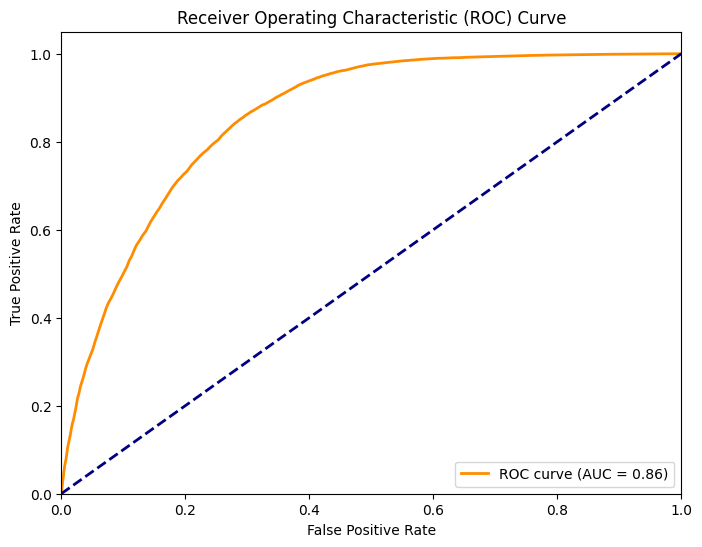

AUC: 0.8565422955180206


In [34]:
# Calculate predicted probabilities for the positive class
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, rf_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC:", roc_auc)


# **Here we get the 85% Roc **

#  Now check on Submission Of TestData

In [35]:
test_data = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
test_data.head(5)

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0  159256   40         165          70       84.0             1.2   
1  159257   80         160          60       93.0             1.0   
2  159258   60         170          70       86.5             0.6   
3  159259   40         160          50       67.0             0.3   
4  159260   40         170          75       89.4             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  \
0              1.2              1               1       130  ...   
1              1.0              2               2       144  ...   
2              0.7              1               1       117  ...   
3              0.4              1               1       116  ...   
4              0.9              1               1       132  ...   

   triglyceride  HDL  LDL  hemoglobin  Urine protein  serum creatinine  AST  \
0           186   49  115        14.2              1               0.9   19   
1           158   35  104        13.0              1               1.1   20   
2           173   39   88        15.4              1               1.4   38   
3            47   75  128        14.5              1               0.6   25   
4           100   39  123        16.5              1               1.0   30   

   ALT  Gtp  dental caries  
0   25   32              0  
1   12   24              0  
2   60   36              0  
3   18   10              1  
4   39   27              1  

[5 rows x 23 columns]

In [36]:
test_id =test_data['id']

In [37]:
y_pred =model_pipeline.predict_proba(test_data)

In [38]:
y_pred[:,1].shape

(106171,)

In [39]:
#Submission Of data
submission_df =pd.DataFrame()
submission_df['id']=test_id
submission_df['smoking']=y_pred[:,1]
submission_df.head()

id  smoking
0  159256     0.45
1  159257     0.45
2  159258     0.41
3  159259     0.52
4  159260     0.54

In [40]:
submission_df.to_csv('submitfile.csv', index=False, columns=['id', 'smoking'])